# 3. Train a Model with Different Optimizers


In [9]:
#importing all necessary packages
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense
import matplotlib.pyplot as plt

In [2]:
# importing dataset from tf 
(x_train, y_train),(X_test, y_test) = tf.keras.datasets.mnist.load_data()
#preprocessing the data by normalizing pixel values and one hot encoding labels
x_train, X_test = x_train / 255.0, X_test / 255.0
y_train, y_test = tf.keras.utils.to_categorical(y_train), tf.keras.utils.to_categorical(y_test)
print(f'input image shape: {tf.shape(x_train)}')
print(f'test image shape: {tf.shape(x_train)}')
print(f'input label shape: {tf.shape(y_train)}')
print(f'test label shape: {tf.shape(y_test)}')

input image shape: [60000    28    28]
test image shape: [60000    28    28]
input label shape: [60000    10]
test label shape: [10000    10]


In [3]:
# defining a function to create a simple neural net with variable optimizers
def create_model(optimizer):
    model = Sequential(
       [ Flatten(input_shape=(28,28)),
        Dense(784, activation='relu'),
        Dense(512, activation='relu'),
        Dense(10, activation='softmax')]
    )
    model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
    return model

In [5]:
# creating a neural net with adam optimizer and training it
model_adam = create_model(tf.keras.optimizers.Adam())
model_adam.summary()
history_adam = model_adam.fit(x_train, y_train, epochs=5, validation_data=(X_test, y_test), verbose=2)

c:\Users\gadda\Documents\handsOnML\pandas\GENAI\venv\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_1 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 784)            │       615,440 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 512)            │       401,920 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 10)             │         5,130 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,022,490 (3.90 MB)

 Trainable params: 1,022,490 (3.90 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/5
1875/1875 - 9s - 5ms/step - accuracy: 0.9448 - loss: 0.1800 - val_accuracy: 0.9629 - val_loss: 0.1157
Epoch 2/5
1875/1875 - 8s - 4ms/step - accuracy: 0.9747 - loss: 0.0824 - val_accuracy: 0.9787 - val_loss: 0.0662
Epoch 3/5
1875/1875 - 8s - 4ms/step - accuracy: 0.9828 - loss: 0.0543 - val_accuracy: 0.9773 - val_loss: 0.0763
Epoch 4/5
1875/1875 - 12s - 6ms/step - accuracy: 0.9866 - loss: 0.0423 - val_accuracy: 0.9787 - val_loss: 0.0730
Epoch 5/5
1875/1875 - 9s - 5ms/step - accuracy: 0.9883 - loss: 0.0358 - val_accuracy: 0.9781 - val_loss: 0.0901


In [7]:
# creating a neural net with stochastic gradient descent optimizer and training it
model_SGD = create_model(tf.keras.optimizers.SGD())
model_SGD.summary()
history_sgd = model_SGD.fit(x_train, y_train, epochs=5, validation_data=(X_test, y_test), verbose=2)

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_3 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 784)            │       615,440 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 512)            │       401,920 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 10)             │         5,130 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,022,490 (3.90 MB)

 Trainable params: 1,022,490 (3.90 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/5
1875/1875 - 6s - 3ms/step - accuracy: 0.8670 - loss: 0.5374 - val_accuracy: 0.9219 - val_loss: 0.2860
Epoch 2/5
1875/1875 - 5s - 3ms/step - accuracy: 0.9237 - loss: 0.2684 - val_accuracy: 0.9351 - val_loss: 0.2279
Epoch 3/5
1875/1875 - 5s - 3ms/step - accuracy: 0.9391 - loss: 0.2162 - val_accuracy: 0.9452 - val_loss: 0.1916
Epoch 4/5
1875/1875 - 5s - 3ms/step - accuracy: 0.9487 - loss: 0.1823 - val_accuracy: 0.9533 - val_loss: 0.1637
Epoch 5/5
1875/1875 - 5s - 3ms/step - accuracy: 0.9554 - loss: 0.1573 - val_accuracy: 0.9561 - val_loss: 0.1517


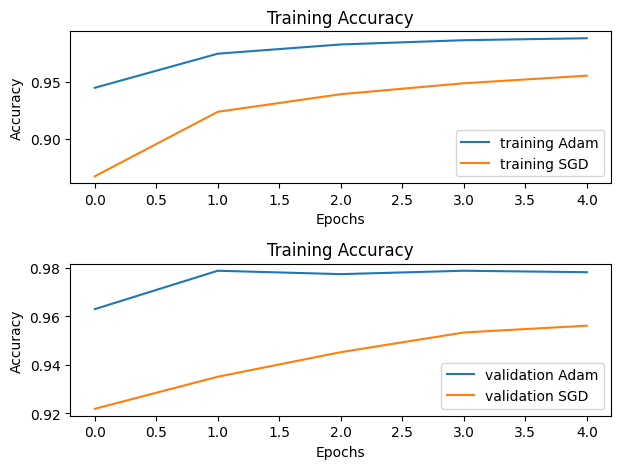

In [ ]:
# creating a figure with 2 subplots to plot the training accuracy and validation accuracy of the two models
plt.subplot(2,1,1)
plt.plot(history_adam.history['accuracy'], label='training Adam')
plt.plot(history_sgd.history['accuracy'], label='training SGD')
plt.title('Training Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(2,1,2)
plt.plot(history_adam.history['val_accuracy'], label='validation Adam')
plt.plot(history_sgd.history['val_accuracy'], label='validation SGD')
plt.title('Training Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()